In [1]:
from estimark.agents import IndShkLifeCycleConsumerType
from estimark.parameters import init_consumer_objects
from HARK.utilities import plot_funcs
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
csv_file_path = "../../content/tables/IndShock_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
DiscFac, CRRA = res.iloc[:2, 1].astype(float).tolist()

In [3]:
indshk_agent = IndShkLifeCycleConsumerType(**init_consumer_objects)
indshk_agent.CRRA = CRRA
indshk_agent.DiscFac = DiscFac
CRRA, DiscFac

(6.544717818277925, 0.9741108069484679)

In [4]:
indshk_agent.solve()

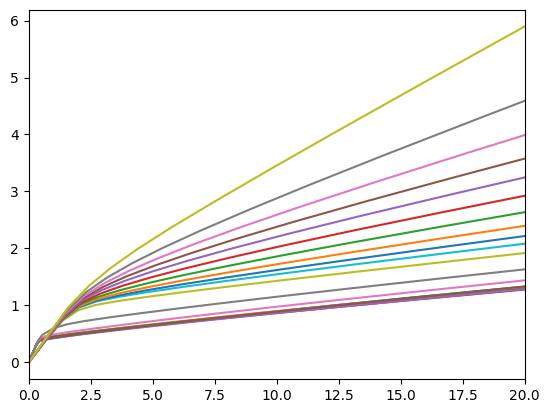

In [5]:
plot_funcs([sol.cFunc for sol in indshk_agent.solution[:-1:5]], 0, 20)
# plt.savefig("../content/figures/IndShock_cFunc.png")

In [6]:
# Set up the variables we want to keep track of.
indshk_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

indshk_agent.T_sim = indshk_agent.T_cycle + 1
# Run the simulations
indshk_agent.initialize_sim()
history = indshk_agent.simulate()

In [7]:
raw_data = {
    "Age": indshk_agent.history["t_age"].flatten() + 25,
    "pIncome": indshk_agent.history["pLvl"].flatten(),
    "nrmM": indshk_agent.history["mNrm"].flatten(),
    "nrmC": indshk_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

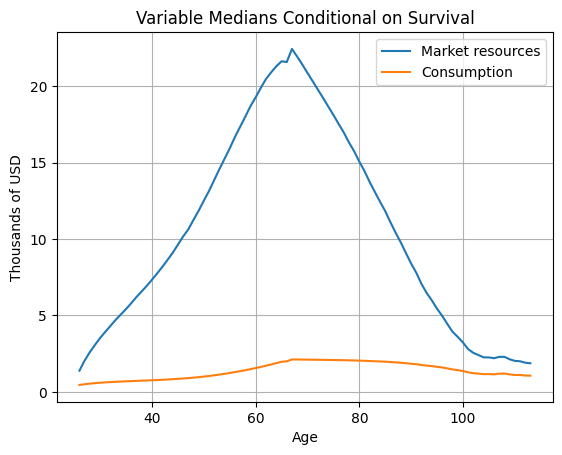

In [8]:
plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.nrmM, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.nrmC, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()

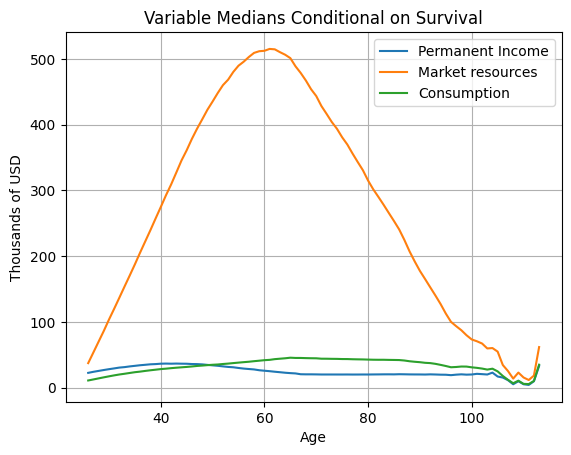

In [9]:
plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()